# Homework (12 pts) - Regularization

In [2]:
from sklearn import datasets

dataset = datasets.load_wine()

---
1. (5 pts) Use sklearn's `RidgeCV` class to perform Ridge regression on the above dataset. Try 1000 values of the hyperparameter $\alpha$ on a logscale from 0.01 to 100.

* !!! Make sure to standardize all features and target data first.
* Plot the model's coefficents as a bar plot with feature names on the x-axis exactly as for the previous homework on linear regression.
* Report the optimal value for the hyperparameter $\alpha$.

In [19]:
import numpy as np

X = dataset.data
y = dataset.target

X = X - X.mean(axis=0)
X = X / X.std(axis=0)

y = y - y.mean()
y = y / y.std()

from sklearn.linear_model import RidgeCV

alphas = np.logspace(-2, 2, 1000)
ridge = RidgeCV(alphas=alphas)
ridge.fit(X, y);

print(f"Optimal alpha = {ridge.alpha_}")

Optimal alpha = 6.650018030431118


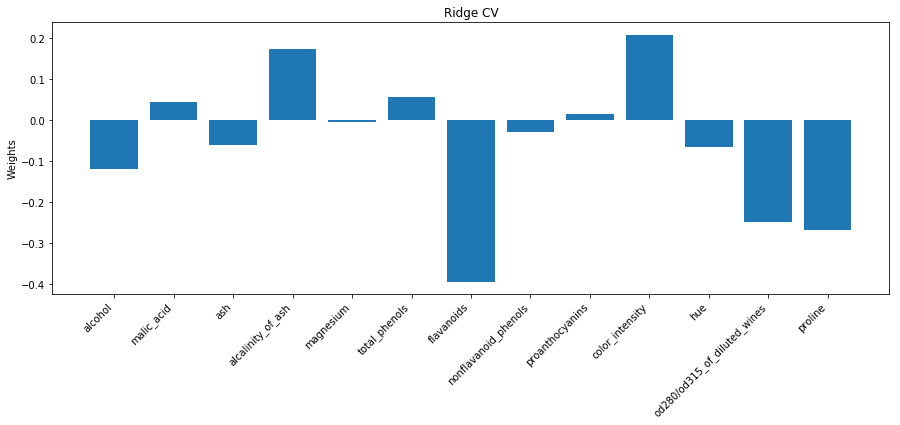

In [20]:
import matplotlib.pyplot as plt

nfeatures = X.shape[1]
plt.figure(figsize=(15, 5))
plt.bar(range(nfeatures), ridge.coef_)
plt.xticks(range(nfeatures), dataset.feature_names, rotation=45, ha='right')
plt.ylabel('Weights')
plt.title('Ridge CV');

---
2. (5 pts) Use sklearn's `LassoCV` class to perform Lasso regression on the above dataset. Try 1000 values of the hyperparameter $\alpha$ on a logscale from 0.0001 to 1.

* !!! Make sure to standardize all features and target data first.
* Plot the model's coefficents as a bar plot with feature names on the x-axis exactly as for the previous homework on linear regression.
* Report the optimal value for the hyperparameter $\alpha$.

In [23]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-4, 0, 1000)
lasso = LassoCV(alphas=alphas)
lasso.fit(X, y);

print(f"Optimal alpha = {lasso.alpha_}")

Optimal alpha = 0.007618717702322999


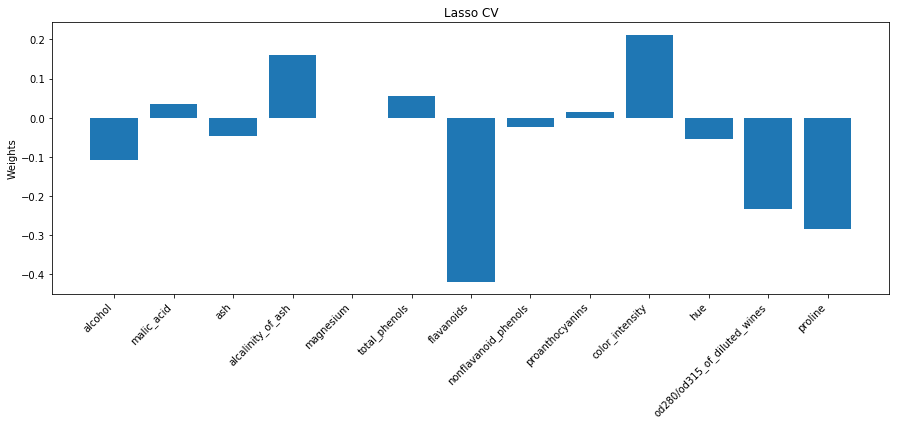

In [25]:
nfeatures = X.shape[1]
plt.figure(figsize=(15, 5))
plt.bar(range(nfeatures), lasso.coef_)
plt.xticks(range(nfeatures), dataset.feature_names, rotation=45, ha='right')
plt.ylabel('Weights')
plt.title('Lasso CV');

---
2. (2 pts) What is similar/different between the two model's?

* Coefficents with large weights (positive or negative) are similar for both models.
* Tiny coefficents (e.g. magnesium) in the Ridge model are set to zero in the Lasso model.